# Table of contents

1. Importing libraries and data
2. Preparing data for further analysis
3. Elbowing the data
- Defining k-means clusters
- Plotting elbow curve
4. k-means clustering

# 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
# Letting graphs be displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Importing dataset

df = pd.read_csv(r'/Users/zoey/Career Foundry Stuff/Achievement 6/cleaned_NBA_data.csv')

In [4]:
df.shape

(12844, 22)

In [5]:
df.columns

Index(['player_name', 'team_abbreviation', 'age', 'player_height',
       'player_weight', 'college', 'country', 'draft_year', 'draft_round',
       'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct',
       'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season',
       'attended_college'],
      dtype='object')

In [6]:
df.head(25)

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,attended_college
0,Randy Livingston,HOU,22,193.04,94.800728,Louisiana State,USA,1996,2,42,...,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97,True
1,Gaylon Nickerson,WAS,28,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,34,...,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97,True
2,George Lynch,VAN,26,203.20,103.418976,North Carolina,USA,1993,1,12,...,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97,True
3,George McCloud,LAL,30,203.20,102.058200,Florida State,USA,1989,1,7,...,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97,True
4,George Zidek,DEN,23,213.36,119.748288,UCLA,USA,1995,1,22,...,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97,True
5,Gerald Wilkins,ORL,33,198.12,102.058200,Tennessee-Chattanooga,USA,1985,2,47,...,2.2,2.2,-5.8,0.031,0.064,0.203,0.503,0.143,1996-97,True
6,Gheorghe Muresan,WAS,26,231.14,137.438376,NaN,USA,1993,2,30,...,6.6,0.4,6.9,0.098,0.217,0.185,0.618,0.024,1996-97,True
7,Glen Rice,CHH,30,203.20,99.790240,Michigan,USA,1989,1,4,...,4.0,2.0,3.2,0.025,0.087,0.272,0.605,0.088,1996-97,True
8,Glenn Robinson,MIL,24,200.66,106.594120,Purdue,USA,1994,1,1,...,6.3,3.1,-2.9,0.051,0.144,0.278,0.528,0.146,1996-97,True
9,Grant Hill,DET,24,203.20,102.058200,Duke,USA,1994,1,3,...,9.0,7.3,6.9,0.049,0.232,0.283,0.556,0.356,1996-97,True


# 2. Preparing data for further analysis

In [7]:
# Dropping all my non-numerical columns for further analysis

numerical_df = df.select_dtypes(exclude=['object'])

In [8]:
numerical_df.shape

(12844, 14)

In [9]:
numerical_df.head(25)

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,attended_college
0,22,193.04,94.800728,64,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,True
1,28,190.50,86.182480,4,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,True
2,26,203.20,103.418976,41,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,True
3,30,203.20,102.058200,64,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,True
4,23,213.36,119.748288,52,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,True
5,33,198.12,102.058200,80,10.6,2.2,2.2,-5.8,0.031,0.064,0.203,0.503,0.143,True
6,26,231.14,137.438376,73,10.6,6.6,0.4,6.9,0.098,0.217,0.185,0.618,0.024,True
7,30,203.20,99.790240,79,26.8,4.0,2.0,3.2,0.025,0.087,0.272,0.605,0.088,True
8,24,200.66,106.594120,80,21.1,6.3,3.1,-2.9,0.051,0.144,0.278,0.528,0.146,True
9,24,203.20,102.058200,80,21.4,9.0,7.3,6.9,0.049,0.232,0.283,0.556,0.356,True


# 3. Elbowing the data
- Defining k-means clusters
- Plotting elbow curve

In [10]:
# Defining the range of potential clusters in the data

num_cl = range(1, 10)

# Defining k-means clusters in the range set above

kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [12]:
# Creating a score that represents a rate of variation for the given cluster options created above

score = [kmeans[i].fit(numerical_df).score(numerical_df) for i in range(len(kmeans))]

# Looking at the scores

score

/Users/zoey/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/zoey/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/zoey/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/zoey/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

[-14018513.950508542,
 -7559472.724640252,
 -6284304.441920383,
 -5440389.116300903,
 -4821959.579518253,
 -4316267.059744254,
 -3930907.324231764,
 -3602219.6487795203,
 -3385065.255301383]

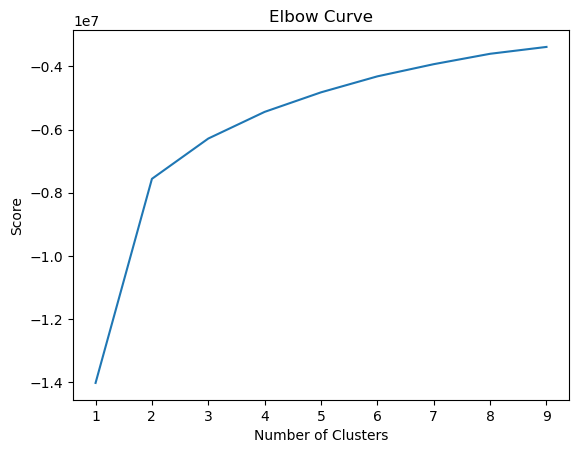

In [13]:
# Plotting the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Since the bend of the curve appears to be at 2, I will use two clusters going forward in the analysis. However, the line doesn't fully straighten out, so, depending on the further results, an analysis using seven or even nine clusters could be worthwhile, just to see what the output of that is. 

# 4. k-means clustering

In [14]:
# Creating the k-means object.

kmeans = KMeans(n_clusters = 2)

In [15]:
# Fit the k-means object to the data.

kmeans.fit(numerical_df)

/Users/zoey/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

In [16]:
numerical_df['clusters'] = kmeans.fit_predict(numerical_df)

/Users/zoey/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [17]:
numerical_df.head(25)

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,attended_college,clusters
0,22,193.04,94.800728,64,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,True,0
1,28,190.50,86.182480,4,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,True,1
2,26,203.20,103.418976,41,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,True,1
3,30,203.20,102.058200,64,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,True,0
4,23,213.36,119.748288,52,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,True,0
5,33,198.12,102.058200,80,10.6,2.2,2.2,-5.8,0.031,0.064,0.203,0.503,0.143,True,0
6,26,231.14,137.438376,73,10.6,6.6,0.4,6.9,0.098,0.217,0.185,0.618,0.024,True,0
7,30,203.20,99.790240,79,26.8,4.0,2.0,3.2,0.025,0.087,0.272,0.605,0.088,True,0
8,24,200.66,106.594120,80,21.1,6.3,3.1,-2.9,0.051,0.144,0.278,0.528,0.146,True,0
9,24,203.20,102.058200,80,21.4,9.0,7.3,6.9,0.049,0.232,0.283,0.556,0.356,True,0


In [18]:
numerical_df['clusters'].value_counts()

clusters
0    8240
1    4604
Name: count, dtype: int64

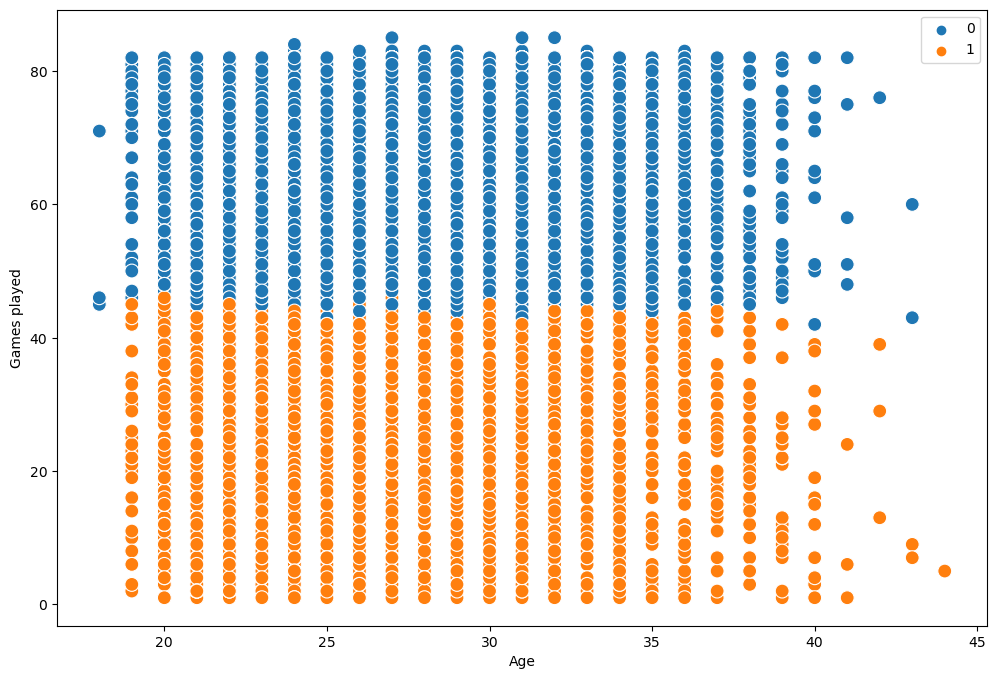

In [19]:
# Plotting the clusters for the "age" and "games played" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=numerical_df['age'], y=numerical_df['gp'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Age')
plt.ylabel('Games played')
plt.show()

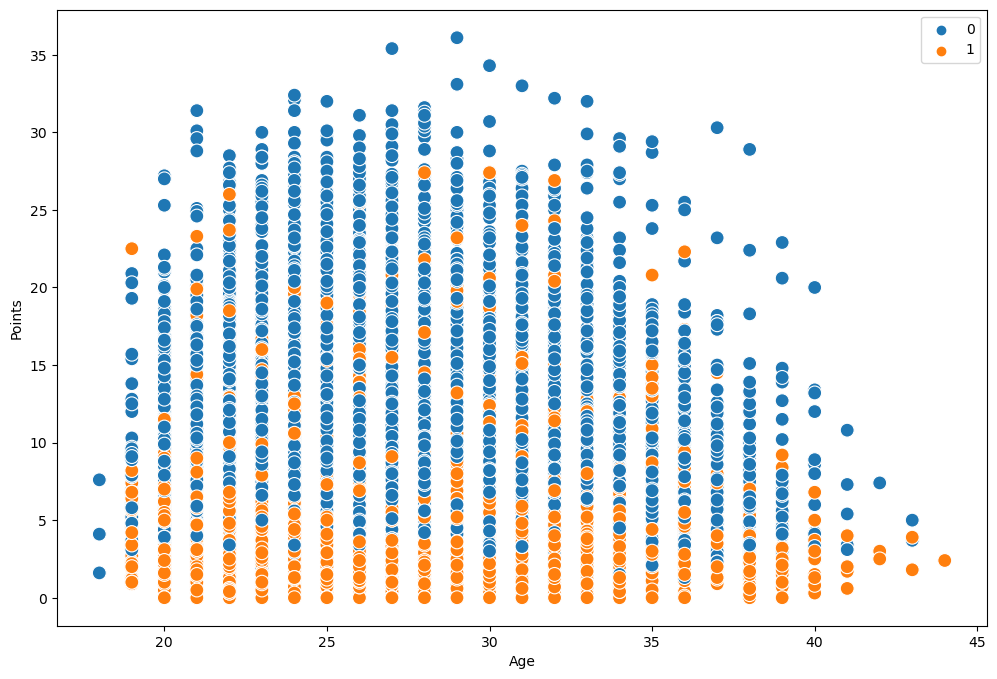

In [20]:
# Plotting the clusters for the "age" and "points" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=numerical_df['age'], y=numerical_df['pts'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Age')
plt.ylabel('Points')
plt.show()

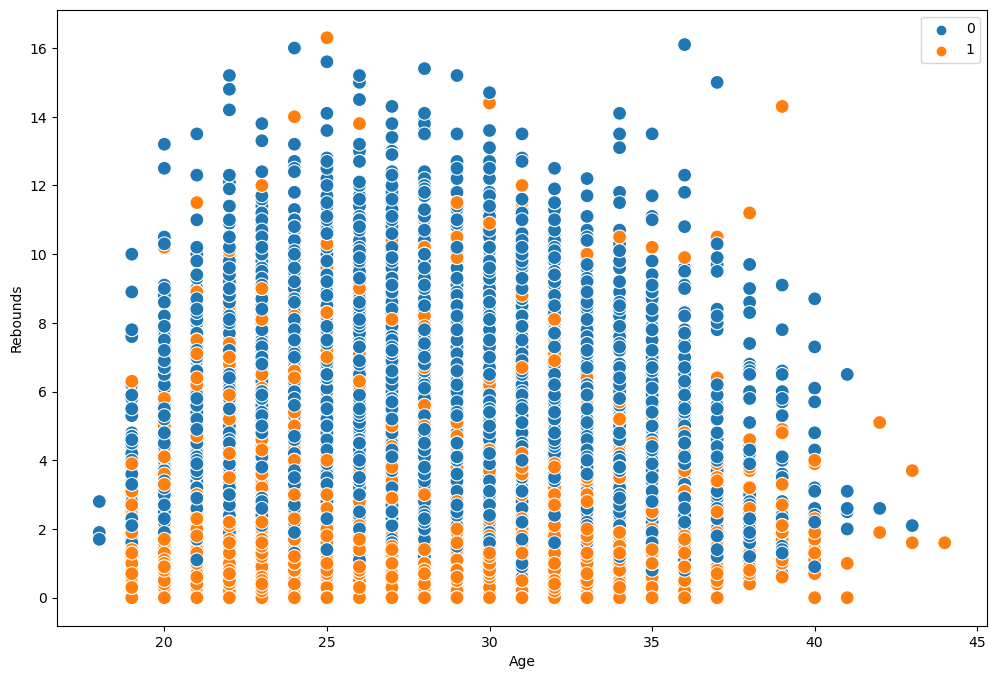

In [21]:
# Plotting the clusters for the "age" and "rebounds" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=numerical_df['age'], y=numerical_df['reb'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Age')
plt.ylabel('Rebounds')
plt.show()

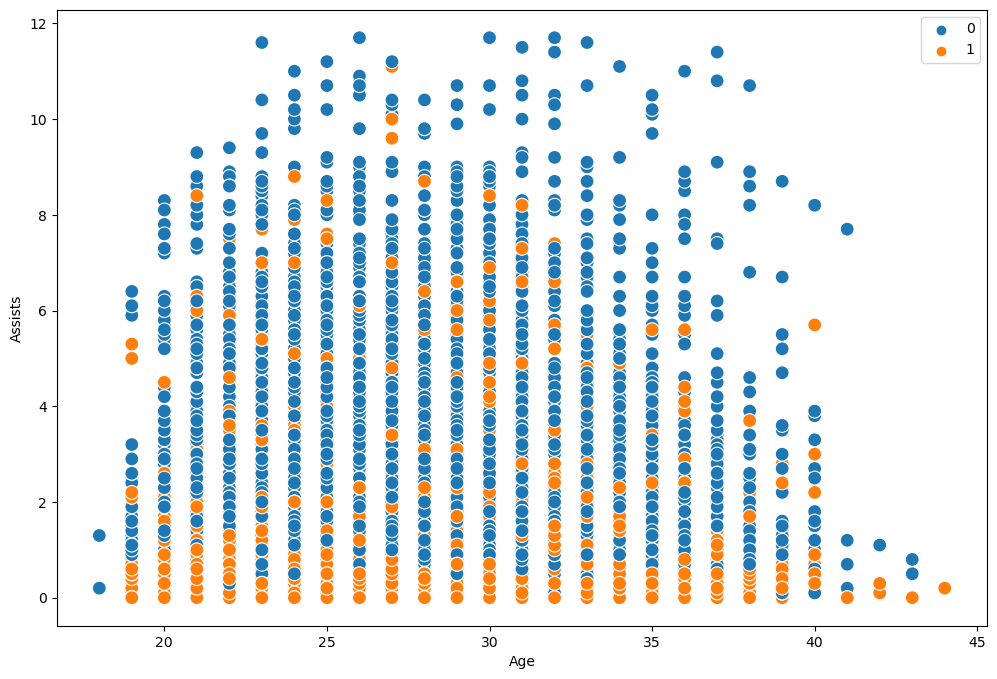

In [22]:
# Plotting the clusters for the "age" and "assists" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=numerical_df['age'], y=numerical_df['ast'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Age')
plt.ylabel('Assists')
plt.show()

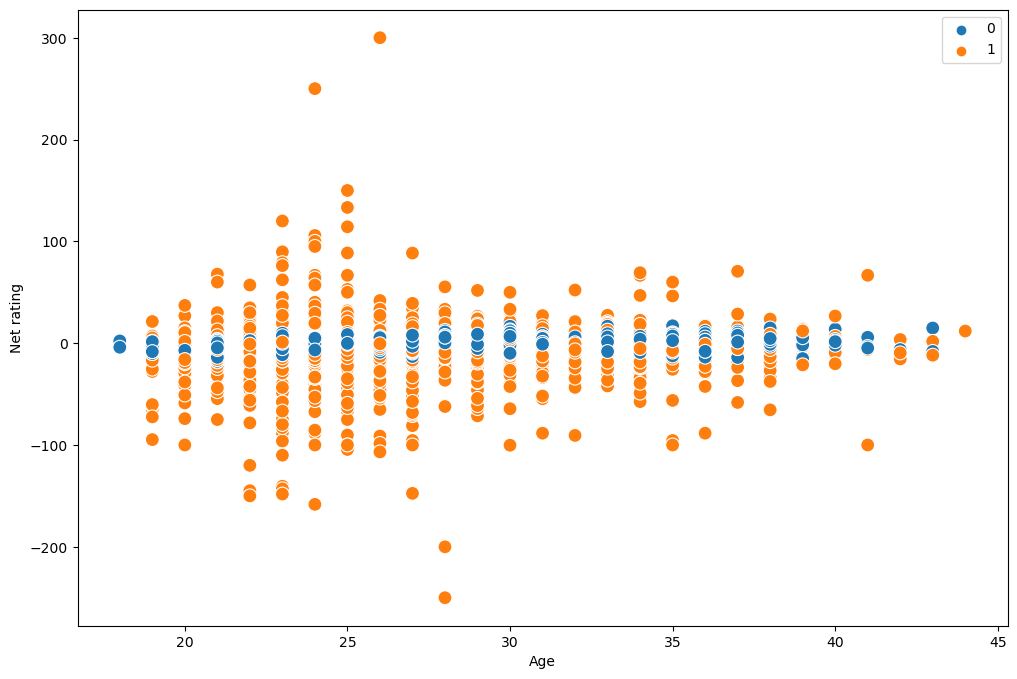

In [23]:
# Plotting the clusters for the "age" and "net rating" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=numerical_df['age'], y=numerical_df['net_rating'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Age')
plt.ylabel('Net rating')
plt.show()

While in the age/games played graph there is a very clear difference between the two clusters, in terms of points, rebounds, and assists the results are much more mixed. Interestingly, with net rating, all of one cluster seems to be centered around 0, meaning that those players had neither a very strong positive or negative impact on the outcome of the game. I am not sure there are any direct learnings from this so far. Depending on the outcome of further analysis, it may be worthwhile to revisit the clustering and re-run this with more clusters to see if other trends jump out of the data. 

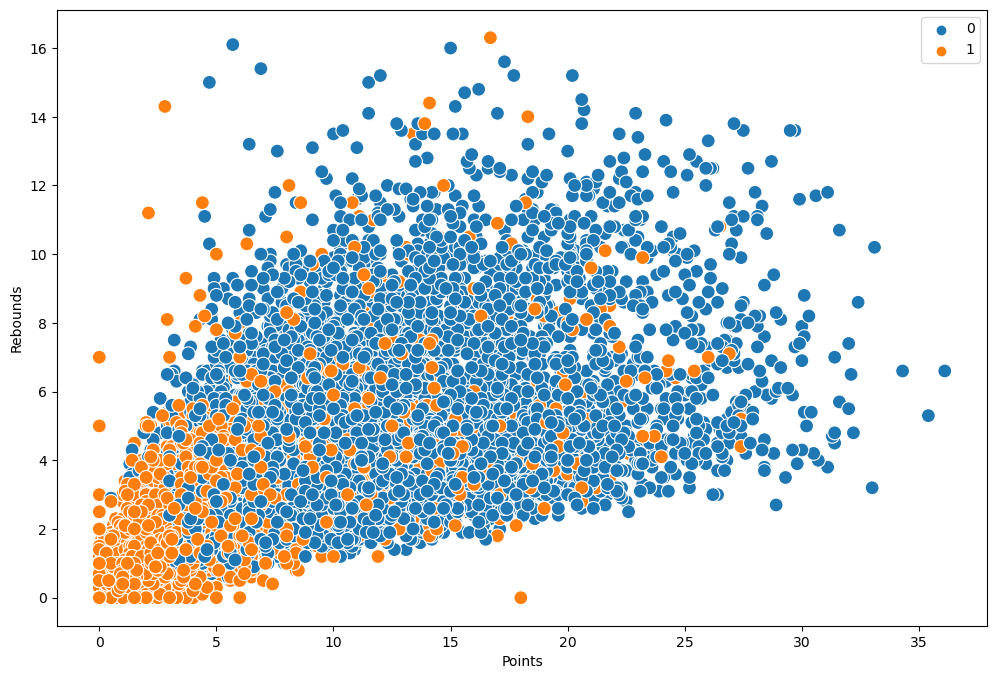

In [24]:
# Plotting the clusters for the "points" and "rebounds" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=numerical_df['pts'], y=numerical_df['reb'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Points')
plt.ylabel('Rebounds')
plt.show()

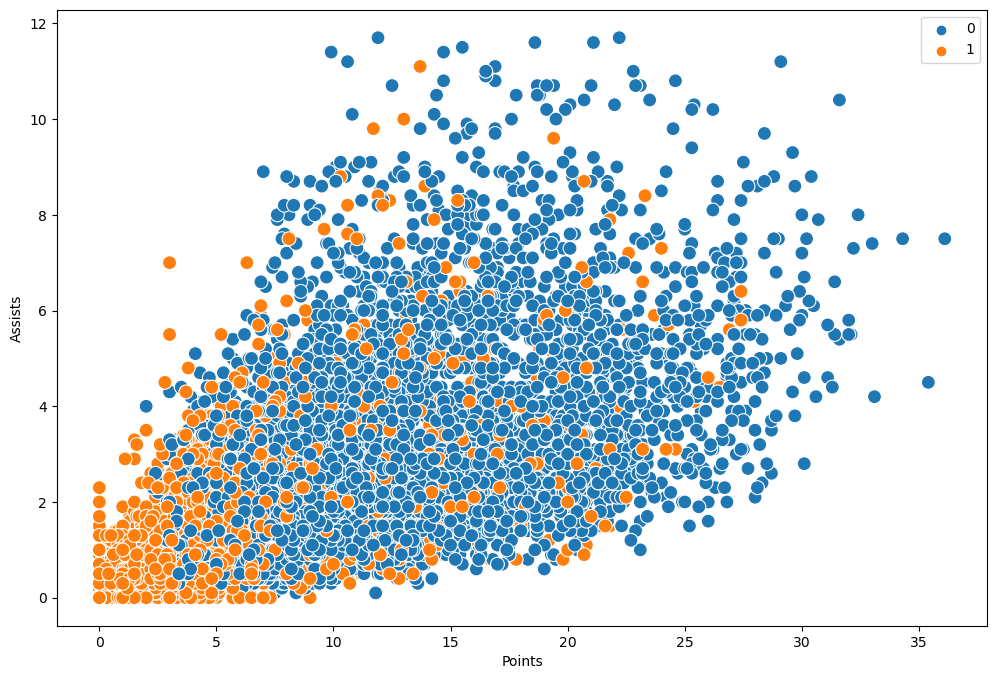

In [25]:
# Plotting the clusters for the "points" and "assists" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=numerical_df['pts'], y=numerical_df['ast'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Points')
plt.ylabel('Assists')
plt.show()

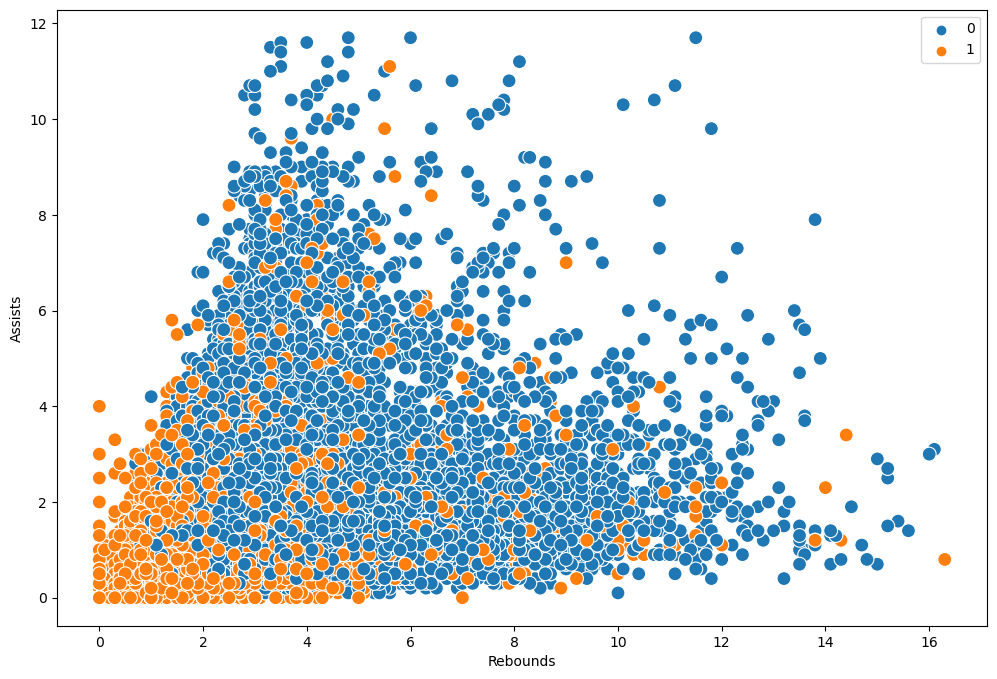

In [26]:
# Plotting the clusters for the "rebounds" and "assists" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=numerical_df['reb'], y=numerical_df['ast'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Rebounds')
plt.ylabel('Assists')
plt.show()

These results seem counter-intuitive to me given the net-rating chart, since players in the blue clusters seem to be more highly contributing in points, rebounds, and assits. This is curious to me.

In [27]:
numerical_df.loc[numerical_df['clusters'] == 1, 'cluster'] = 'orange'
numerical_df.loc[numerical_df['clusters'] == 0, 'cluster'] = 'blue'

In [28]:
numerical_df.groupby('cluster').agg({'age':['mean', 'median'], 
                         'age':['mean', 'median'], 
                         'pts':['mean', 'median'],
                         'reb':['mean', 'median'],
                         'ast':['mean', 'median'], 
                         'gp':['mean', 'median'],
                         'net_rating':['mean', 'median']})

age               pts              reb              ast         \
              mean median       mean median      mean median      mean median   
cluster                                                                         
blue     27.260194   27.0  10.427087    9.2  4.349660    3.8  2.300328    1.7   
orange   26.660730   26.0   4.249175    3.1  2.142485    1.7  0.973393    0.6   

                gp        net_rating         
              mean median       mean median  
cluster                                      
blue     67.610194   69.0  -0.139163    0.0  
orange   21.701998   21.0  -5.961859   -4.8

Based on these results, there is little difference in the age of the players. However, there is a distinct difference in the number of games played, with the blue cluster having played in around three times as many games, and (therefore intuitively) having far higher points, rebounts, and assists. It could be interesting to dig deeper here to see if there are other connections and underlying differences that can be found between the groups. However, I think that further analysis could be conducted on the entire dataset first, before revisiting the clustering as well as these two clusters.